In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 4
import matplotlib.pyplot as plt

In [3]:
# Abrindo o arquivo: Vendas_Diarias.csv 
datasetVendas = pd.read_csv('Vendas_Diarias.csv', sep = ",")
datasetVendas

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396
...,...,...
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244


In [4]:
# Converte a coluna Total_Vendas para numérico (se necessário)
datasetVendas['Total_Vendas'] = pd.to_numeric(datasetVendas['Total_Vendas'], errors='coerce')
# Converte a coluna Data para o formato datetime (se necessário) 
datasetVendas['Data'] = pd.to_datetime(datasetVendas['Data'])

## **Verificando os valores de outliers**

In [6]:
# Calculando Q1, Q3 e IQR
Q1 = datasetVendas['Total_Vendas'].quantile(0.25)
Q3 = datasetVendas['Total_Vendas'].quantile(0.75)
IQR = Q3 - Q1

In [7]:
# Definindos os limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [8]:
# Identificando os outliers com a criação da coluna: Outlier
datasetVendasAjuste = datasetVendas.copy()  # Garante que você está trabalhando com uma cópia
datasetVendasAjuste.loc[:, 'Outlier'] = (datasetVendas['Total_Vendas'] < limite_inferior) | (datasetVendas['Total_Vendas'] > limite_superior)
datasetVendasAjuste

,Data,Total_Vendas,Outlier
0,2023-01-01,53.483571,False
1,2023-01-02,57.176993,False
2,2023-01-03,63.087722,False
3,2023-01-04,62.103987,False
4,2023-01-05,44.690396,False
...,...,...,...
360,2023-12-27,74.935570,False
361,2023-12-28,71.374857,False
362,2023-12-29,57.806920,False
363,2023-12-30,62.340244,False


In [9]:
# Verifica se há pelo menos um outlier
outlier_counts = datasetVendasAjuste['Outlier'].value_counts()
# Verifica se há outliers 
if outlier_counts.get(True, 0) > 0:
    print("Quantidade de outliers: ", outlier_counts[True])
    print("Resultado: Possui outliers")
else:
    print("Quantidade de outliers: 0")
    print("Resultado: Não possui outliers")

Quantidade de outliers: 0
Resultado: Não possui outliers


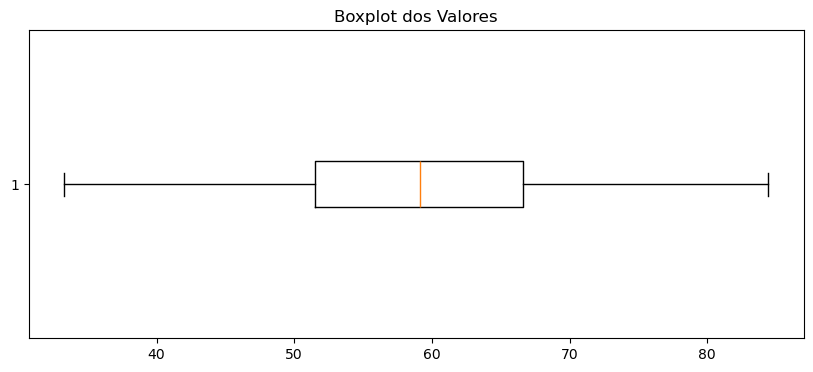

In [10]:
#Visualização de Gráficos com o BoxPlot para verificar a ausencia ou presença de outliers
plt.boxplot(datasetVendasAjuste['Total_Vendas'], vert=False)
plt.title('Boxplot dos Valores')
plt.show()

In [11]:
# Excluindo a coluna Outlier 
datasetVendasAjuste.drop(columns='Outlier')

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396
...,...,...
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244


# **Análise exploratória no formato diário dos meses**

In [13]:
datasetVendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [14]:
# Converter o DataFrame em uma série temporal com a data como índice
serie_temporal = datasetVendas.set_index('Data')['Total_Vendas']
serie_temporal = serie_temporal.asfreq('D')
type(serie_temporal)

pandas.core.series.Series

In [15]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

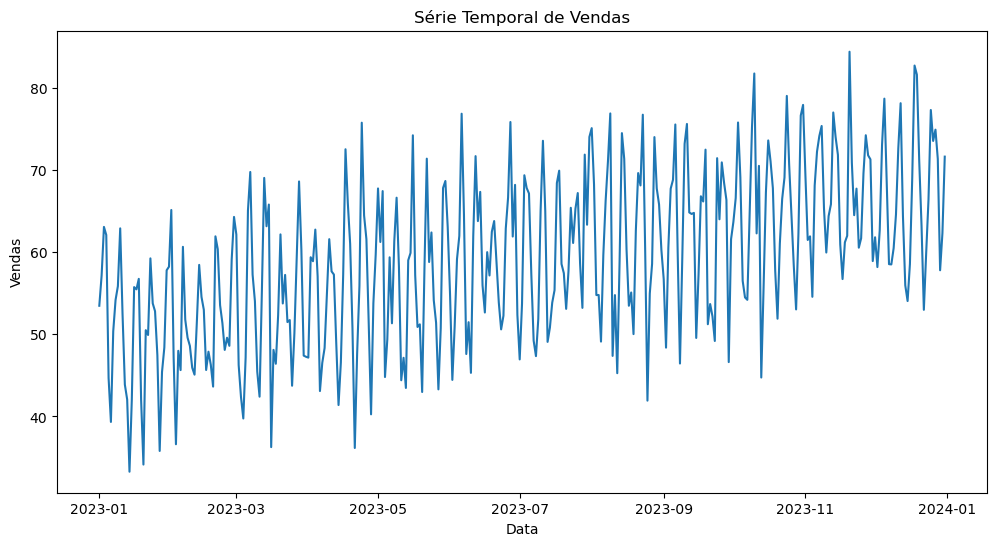

In [16]:
# Cria o gráfico da série temporal 
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal)
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Série Temporal de Vendas')
plt.show()

In [17]:
# Calculando a média diária (Valores somados de cada dia do mês, divido pelo número de dias dos mês)
media_diaria = serie_temporal.resample('ME').mean()
for data, media in media_diaria.items(): 
    print('Média Diária de {}: {:.2f}'.format(data.strftime('%B/%Y'), media))
# Calculando a média anual ( Valores médios somados dos 12 meses divido por 12)
media_anual = serie_temporal.mean()
print('\nMédia Anual: {:.2f}'.format(media_anual))

Média Diária de January/2023: 50.34
Média Diária de February/2023: 51.51
Média Diária de March/2023: 53.61
Média Diária de April/2023: 54.86
Média Diária de May/2023: 57.04
Média Diária de June/2023: 59.26
Média Diária de July/2023: 60.29
Média Diária de August/2023: 61.56
Média Diária de September/2023: 61.83
Média Diária de October/2023: 65.29
Média Diária de November/2023: 67.09
Média Diária de December/2023: 66.62

Média Anual: 59.15


In [18]:
df = pd.DataFrame(media_diaria)
df = df.reset_index()  # Move o índice para uma coluna
df.rename(columns={'index': 'Data'}, inplace=True)  # Renomeia a coluna para 'Data'
df['Data'] = pd.to_datetime(df['Data'])  # Convertendo a coluna Data para datetime
df['Mês'] = df['Data'].dt.strftime('%b')  # Extraindo o nome do mês
df

,Data,Total_Vendas,Mês
0,2023-01-31,50.341517,Jan
1,2023-02-28,51.509158,Feb
2,2023-03-31,53.605199,Mar
3,2023-04-30,54.863131,Apr
4,2023-05-31,57.037586,May
5,2023-06-30,59.261858,Jun
6,2023-07-31,60.291703,Jul
7,2023-08-31,61.556809,Aug
8,2023-09-30,61.834062,Sep
9,2023-10-31,65.291677,Oct


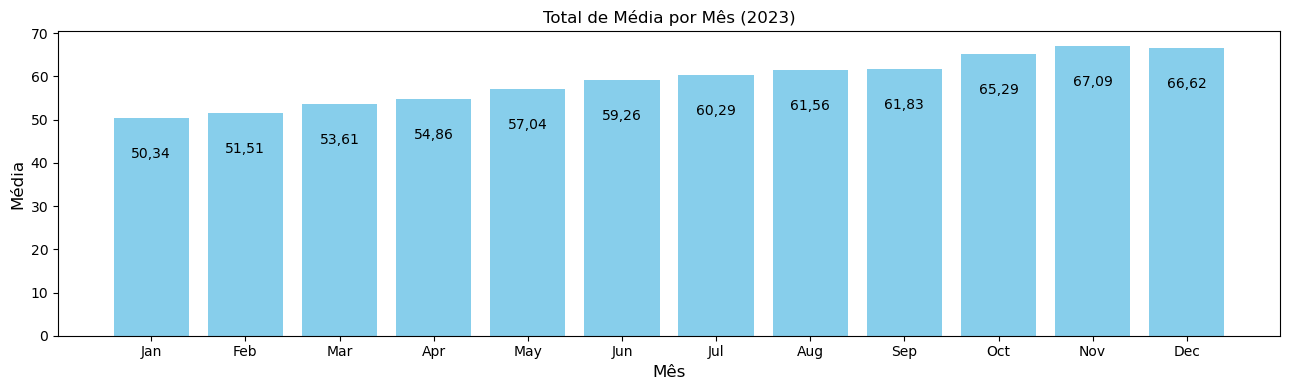

In [19]:
# Configurar o locale para formato brasileiro
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
# Plotando o gráfico de barras
plt.figure(figsize=(13, 4))
bars = plt.bar(df['Mês'], df['Total_Vendas'], color='skyblue')

# Adicionando os valores nas barras
for bar, valor in zip(bars, df['Total_Vendas']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posição no eixo X
        bar.get_height() - 10,             # Posição no eixo Y (um pouco acima da barra)
        locale.format_string('%.2f', valor, grouping=True),  # Formato brasileiro
        ha='center', va='bottom', fontsize=10  # Centralizado e com fonte ajustada
    )
# Configurações do gráfico
plt.title('Total de Média por Mês (2023)', fontsize=12)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Média', fontsize=12)
plt.tight_layout()
# Mostrar o gráfico
plt.show()

In [20]:
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [21]:
# Cria o modelo
modelo = SimpleExpSmoothing(serie_temporal)

In [22]:
# Treinamento (ajuste) do modelo
modelo_ajustado = modelo.fit(smoothing_level = 0.2, optimized=False)

In [23]:
# Extrai os valores previstos pelo modelo
suavizacao_exponencial = modelo_ajustado.fittedvalues

In [24]:
suavizacao_exponencial

Data
2023-01-01    53.483571
2023-01-02    53.483571
2023-01-03    54.222255
2023-01-04    55.995349
2023-01-05    57.217076
                ...    
2023-12-27    68.660021
2023-12-28    69.915131
2023-12-29    70.207076
2023-12-30    67.727045
2023-12-31    66.649685
Freq: D, Length: 365, dtype: float64

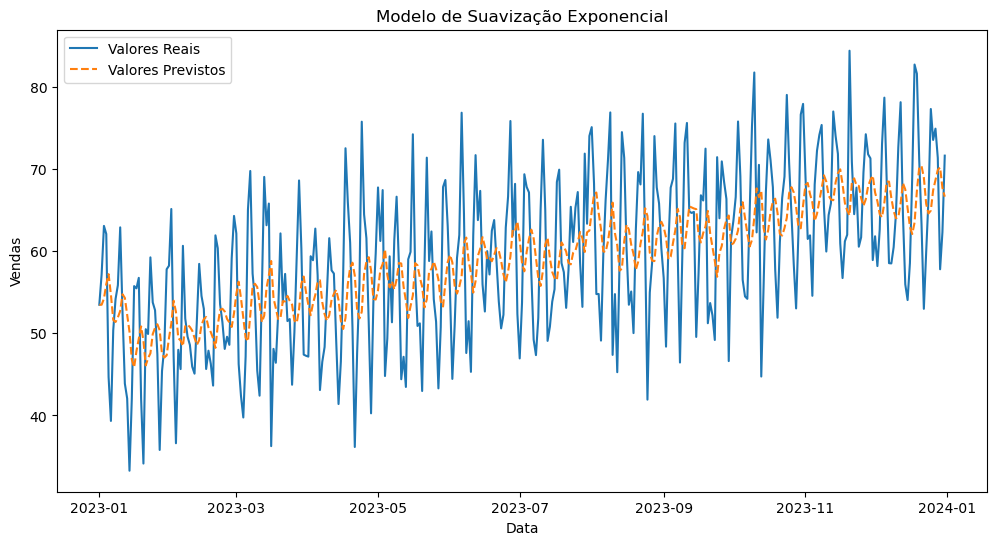

In [25]:
# Plot
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal, label = 'Valores Reais')
plt.plot(suavizacao_exponencial, label = 'Valores Previstos', linestyle = '--')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Modelo de Suavização Exponencial')
plt.legend()
plt.show()

## **Previsão com o Modelo Treinado com Médias Mensais**

In [27]:
# Fazer previsões
num_previsoes_medias = 1
previsoes_medias = modelo_ajustado.forecast(steps=num_previsoes_medias)
# Acessando a previsão para Janeiro/2024 
previsao_janeiro_media_2024 = previsoes_medias.iloc[0]
print('Previsão média de Vendas Para Janeiro/2024:', round(previsao_janeiro_media_2024, 2))


Previsão média de Vendas Para Janeiro/2024: 67.65


# **AVALIANDO O DESEMPENHO**

In [29]:
print('Média anual em meses (Somatório acumulado): {:.2f}'.format(media_anual))

Média anual em meses (Somatório acumulado): 59.15


In [30]:
#Acessando o primeiro valor do datasetVendasMensal 
primeiro_valor = datasetVendas.iloc[0]['Total_Vendas']
print(primeiro_valor)  

53.48357076505616


In [31]:
# Lista com valor média real de janeiro de 2023
lista = [primeiro_valor]
valor_real = pd.DataFrame(lista, columns = ['valor real'])
print(valor_real)

   valor real
0   53.483571


In [32]:
# Convertendo o valor da previsão em uma lista
lista = [previsao_janeiro_media_2024]
valor_previsto = pd.DataFrame(lista, columns=['valor previsto'])
print(valor_previsto)

   valor previsto
0       67.649892


In [33]:
desempenho = pd.concat([valor_real, valor_previsto],axis=1)
desempenho

,valor real,valor previsto
0,53.483571,67.649892


# **ERRO MÉDIO ABSOLUTO (MAE)**

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
print('ERRO MÉDIO ABSOLUTO (MAE)') 
mae = mean_absolute_error(desempenho['valor real'], desempenho['valor previsto'])
#Suavização Exponencial Simples
print('SES: {:.2f}'.format(mae))

try:
    print('MÉDIA: {:.2f}'.format(media_anual))
except NameError:
    print('Erro: A variável "media_anual" não foi definida.')
    
resultado = (lambda mae, media: 'Modelo aprovado' if mae < media else 'Modelo não aprovado')(mae, media_anual)
print(resultado)

ERRO MÉDIO ABSOLUTO (MAE)
SES: 14.17
MÉDIA: 59.15
Modelo aprovado


# **ERRO QUADRÁTICO MÉDIO (MSE)**

In [38]:
print('ERRO QUADRÁTICO MÉDIO (MSE)')
mse = mean_squared_error(desempenho['valor real'], desempenho['valor previsto'])
#Suavização Exponencial Simples
print('SES: {:.2f}'.format(mse))

def calcular_mediaAnualTotalVendas(media_anual):
    media_valor_venda_ao_quadrado = media_anual ** 2
    return media_valor_venda_ao_quadrado

try:
    media_ao_quadrado = calcular_mediaAnualTotalVendas(media_anual)
    print('MÉDIA: {:.2f}'.format(media_ao_quadrado))
    
    percentual_mse = (mse / media_ao_quadrado) * 100
    print('%: {:.2f}'.format(percentual_mse))

    if percentual_mse < 10:
        print('Modelo excelente')
    elif percentual_mse < 30:
        print('Modelo bom')
    elif percentual_mse < 50:
        print('Modelo razoável')
    else:
        print('Modelo rejeitado')

except NameError:
    print('Erro: A variável "media_valor_venda" não foi definida.')


ERRO QUADRÁTICO MÉDIO (MSE)
SES: 200.68
MÉDIA: 3499.01
%: 5.74
Modelo excelente


# **RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)**

In [40]:
from sklearn.metrics import mean_squared_error
print('RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)')
mse = mean_squared_error(desempenho['valor real'], desempenho['valor previsto'])
rmse = np.sqrt(mse)
print('SES: {:.2f}'.format(rmse))

try:
    print('MÉDIA: {:.2f}'.format(media_anual))
except NameError:
    print('Erro: A variável "media_valor_venda" não foi definida.')

resultado = (lambda rmse, media: 'Modelo aprovado' if rmse < media else 'Modelo não aprovado')(rmse, media_anual)
print(resultado)


RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)
SES: 14.17
MÉDIA: 59.15
Modelo aprovado


# **ERRO PERCENTUAL MÉDIA ABSOLUTO (MAPE)**

In [42]:
print('ERRO PERCENTUAL MÉDIA ABSOLUTO (MAPE)')
desempenho.loc[:, 'valor real'] = pd.to_numeric(desempenho['valor real'], errors='coerce')
desempenho.loc[:, 'valor previsto'] = pd.to_numeric(desempenho['valor previsto'], errors='coerce')
# Calculando o MAPE
mape = np.mean(np.abs((desempenho['valor real'] - desempenho['valor previsto']) / desempenho['valor real'])) * 100
# Suavização Exponencial Simples
print('SES: {:.2f}%'.format(mape))

try:
    print('MÉDIA: {:.2f}'.format(media_anual))
except NameError:
    print('Erro: A variável "mediaAnualTotalVendas" não foi definida.')

# Avaliando o desempenho do modelo
if mape < 10: 
    print('Modelo excelente')
elif mape < 20: 
    print('Modelo bom')
elif mape < 50:
    print('Modelo razoável') 
else: 
    print('Modelo ruim')


ERRO PERCENTUAL MÉDIA ABSOLUTO (MAPE)
SES: 26.49%
MÉDIA: 59.15
Modelo razoável


1. Erro Médio Absoluto (MAE)
O Erro Médio Absoluto (Mean Absolute Error - MAE) é a média das diferenças absolutas entre os valores previstos e os valores reais. Em outras palavras, mede o quanto as previsões estão, em média, distantes dos valores reais.

2. Erro Quadrático Médio (MSE)
O Erro Quadrático Médio (Mean Squared Error - MSE) é a média dos quadrados das diferenças entre os valores previstos e os valores reais. Ele é útil porque penaliza erros maiores de forma mais intensa.

3. Raiz do Erro Quadrático Médio (RMSE)
A Raiz do Erro Quadrático Médio (Root Mean Squared Error - RMSE) é a raiz quadrada do MSE. Isso traz a métrica para a mesma unidade dos dados originais, facilitando a interpretação.

4. Erro Percentual Médio Absoluto (MAPE)
O Erro Percentual Médio Absoluto (Mean Absolute Percentage Error - MAPE) é a média das diferenças absolutas entre os valores previstos e os valores reais, expressa como uma porcentagem dos valores reais. É útil para entender a precisão relativa do modelo.